In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('Display.max_columns',None)

In [2]:
df_train=pd.read_excel(r'C:\Users\91964\Desktop\nazia\datascience\Projects_DT\Flight_ticket\Data_train.xlsx')

In [3]:
df_test=pd.read_excel(r'C:\Users\91964\Desktop\nazia\datascience\Projects_DT\Flight_ticket\test_set.xlsx')

In [4]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
# appending train and test data
df=df_train.append(df_test,sort=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [8]:
# total columns=11
# total rows = 13354
# There is no null values present in the dataset except Route and Total_Stops,price
# Total memory usage=1.2+MB
# here price is float datatype and all others are object type columns

In [9]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [10]:
# There is no null values present in the dataset except Route,Total_Stops and price

<AxesSubplot:>

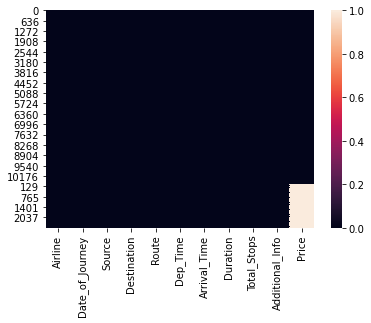

In [11]:
sns.heatmap(df.isna())

In [12]:
# filling missing value

In [13]:
df[df.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [14]:
df[(df['Source']=='Delhi') &(df['Destination']=='Cochin')&(df['Airline']=='Air India') \
          & (df['Dep_Time']=='09:45') & (df['Duration']=='23h 40m') & (df['Price']==7480)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480.0
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480.0
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480.0
7896,Air India,12/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 13 Jun,23h 40m,1 stop,No info,7480.0
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [15]:
df['Route']=df['Route'].fillna('DEL → MAA → COK')
df['Total_Stops']=df['Total_Stops'].fillna('1 stop')

In [16]:
df[df.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [18]:
# total columns=11
# total rows = 10683
# There is no null values present in the dataset 
# Total memory usage=918.2+KB
# here price is int datatype and all others are object type columns

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [20]:
# total columns=10
# total rows = 2671
# There is no null values present in the dataset 
# Total memory usage=208.8+KB
# here all columns are object type columns

In [21]:
df['Date_of_Journey'].value_counts()

18/05/2019    633
6/06/2019     630
12/06/2019    628
9/05/2019     628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
1/06/2019     430
27/06/2019    430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     355
1/05/2019     339
1/04/2019     335
12/05/2019    327
3/03/2019     280
9/03/2019     255
18/03/2019    197
15/03/2019    195
01/03/2019    186
12/03/2019    185
9/04/2019     149
3/04/2019     138
21/06/2019    133
18/06/2019    127
06/03/2019    123
03/03/2019    123
09/03/2019    123
3/05/2019     117
6/04/2019     114
24/04/2019    113
15/04/2019    112
27/04/2019    109
21/04/2019    104
18/04/2019     79
12/04/2019     74
1/03/2019      59
Name: Date_of_Journey, dtype: int64

In [22]:
df['Date_of_Journey']=pd.to_datetime(df_train['Date_of_Journey'])

In [23]:
df['Date_of_Journey'].value_counts()

2019-05-18    644
2019-05-21    638
2019-06-06    636
2019-09-06    614
2019-12-06    614
2019-09-05    606
2019-03-21    526
2019-06-03    512
2019-05-15    501
2019-05-27    478
2019-06-27    436
2019-01-06    428
2019-06-24    428
2019-06-15    413
2019-03-06    406
2019-03-24    397
2019-03-03    394
2019-09-03    372
2019-03-27    369
2019-05-24    360
2019-06-05    352
2019-01-05    338
2019-12-05    318
2019-01-04    311
2019-01-03    260
2019-03-15    200
2019-03-18    199
2019-12-03    175
2019-09-04    163
2019-03-04    140
2019-06-21    138
2019-06-18    132
2019-06-04    127
2019-04-24    123
2019-04-27    118
2019-03-05    110
2019-04-15    109
2019-04-21    108
2019-04-18     83
2019-12-04     78
Name: Date_of_Journey, dtype: int64

In [24]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [25]:
df['Journey_Day']=df['Date_of_Journey'].dt.day
df['Journey_Month']=df['Date_of_Journey'].dt.month
df['Dep_hour']=df['Dep_Time'].dt.hour
df['Dep_min']=df['Dep_Time'].dt.minute
df['Arrival_hour']=df['Arrival_Time'].dt.hour
df['Arrival_min']=df['Arrival_Time'].dt.minute

In [26]:
df=df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1)

In [27]:
df.sample(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
4709,Vistara,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,5403.0,4,1,11,30,14,20
553,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,38h 15m,2 stops,No info,10598.0,3,9,5,0,19,15
955,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,22h 10m,1 stop,No info,13941.0,5,12,6,30,4,40
840,Air India,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6961.0,6,12,13,20,16,10
10125,IndiGo,Delhi,Cochin,DEL → BOM → COK,14h 55m,1 stop,No info,5883.0,6,3,10,35,1,30


In [28]:
df['Duration'].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
30h 15m      1
35h 20m      1
29h 10m      1
47h 40m      1
19h 50m      1
Name: Duration, Length: 374, dtype: int64

In [29]:
df=df.drop(columns='Duration',axis=1)

In [30]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,NaN,3,1,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,NaN,5,1,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,NaN,5,12,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,NaN,18,6,4,0,19,15


In [31]:
df['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → BLR → CCU → BBI → HYD       1
BLR → HBX → BOM → NAG → DEL       1
CCU → IXZ → MAA → BLR             1
CCU → IXA → BLR                   1
BOM → VNS → DEL → HYD             1
Name: Route, Length: 132, dtype: int64

In [32]:
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

In [33]:
df.sample(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
2446,Air India,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,NaN,21,6,6,20,7,40,BOM,HYD,NaN,NaN,NaN
1440,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,NaN,6,3,10,20,12,55,CCU,BLR,NaN,NaN,NaN
4593,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,In-flight meal not included,11150.0,27,6,23,5,19,0,DEL,AMD,BOM,COK,NaN
7212,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8055.0,27,3,6,0,21,0,DEL,BOM,COK,NaN,NaN
2782,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,12373.0,18,5,9,0,19,0,DEL,BOM,COK,NaN,NaN
1415,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,16736.0,3,6,8,0,18,25,BLR,BOM,DEL,NaN,NaN
1788,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1 stop,In-flight meal not included,10844.0,18,5,14,5,16,20,CCU,BOM,BLR,NaN,NaN
1406,Air India,Banglore,Delhi,BLR → DEL,non-stop,No info,5228.0,15,4,13,20,16,10,BLR,DEL,NaN,NaN,NaN
5870,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,4878.0,24,3,7,0,9,40,BLR,DEL,NaN,NaN,NaN
2542,IndiGo,Delhi,Cochin,DEL → HYD → COK,1 stop,No info,NaN,6,3,7,35,22,30,DEL,HYD,COK,NaN,NaN


In [34]:
df=df.drop(columns='Route',axis=1)

In [35]:
df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,3,22,20,1,10,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,5,1,5,50,13,15,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,6,9,9,25,4,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,5,12,18,5,23,30,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302.0,3,1,16,50,21,35,BLR,NAG,DEL,NaN,NaN


In [36]:
df['Total_Stops'].value_counts()

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [37]:
df['Total_Stops']=df['Total_Stops'].replace('1 stop',1)
df['Total_Stops']=df['Total_Stops'].replace('2 stops',2)
df['Total_Stops']=df['Total_Stops'].replace('3 stops',3)
df['Total_Stops']=df['Total_Stops'].replace('4 stops',4)
df['Total_Stops']=df['Total_Stops'].replace('non-stop',0)

In [38]:
df['Total_Stops'].value_counts()

1    7057
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

In [39]:
df.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price               2671
Journey_Day            0
Journey_Month          0
Dep_hour               0
Dep_min                0
Arrival_hour           0
Arrival_min            0
Route1                 0
Route2                 0
Route3              4340
Route4             11397
Route5             13296
dtype: int64

In [40]:
df['Route3'].fillna('None',inplace=True)
df['Route4'].fillna('None',inplace=True)
df['Route5'].fillna('None',inplace=True)

In [41]:
df.isna().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price              2671
Journey_Day           0
Journey_Month         0
Dep_hour              0
Dep_min               0
Arrival_hour          0
Arrival_min           0
Route1                0
Route2                0
Route3                0
Route4                0
Route5                0
dtype: int64

In [42]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [43]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,5,1,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,6,9,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,5,12,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,3,1,16,50,21,35,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,No info,NaN,3,1,20,30,20,25,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,0,No info,NaN,5,1,14,20,16,55,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,1,No info,NaN,5,12,21,50,4,25,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,1,No info,NaN,18,6,4,0,19,15,DEL,BOM,COK,None,None


In [44]:
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [45]:
df=df.drop(columns='Additional_Info',axis=1)

In [46]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,3897.0,24,3,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,7662.0,5,1,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,13882.0,6,9,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,6218.0,5,12,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,13302.0,3,1,16,50,21,35,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,NaN,3,1,20,30,20,25,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,0,NaN,5,1,14,20,16,55,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,1,NaN,5,12,21,50,4,25,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,1,NaN,18,6,4,0,19,15,DEL,BOM,COK,None,None


In [47]:
df.describe(include='O')

,Airline,Source,Destination,Route1,Route2,Route3,Route4,Route5
count,13354,13354,13354,13354,13354,13354,13354,13354
unique,12,5,6,5,45,31,14,6
top,Jet Airways,Delhi,Cochin,DEL,BOM,None,None,None
freq,4746,5682,5682,5682,4890,4340,11397,13296


In [48]:
df.shape

(13354, 16)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
lab_enc=LabelEncoder()

In [51]:
var=['Airline','Source','Destination','Route1','Route2','Route3','Route4','Route5']
for i in var:
    
    df[i]=lab_enc.fit_transform (df[i])

In [52]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
0,3,0,5,0,3897.0,24,3,22,20,1,10,0,13,30,13,5
1,1,3,0,2,7662.0,5,1,5,50,13,15,2,25,1,3,5
2,4,2,1,2,13882.0,6,9,9,25,4,25,3,32,4,5,5
3,3,3,0,1,6218.0,5,12,18,5,23,30,2,34,3,13,5
4,3,0,5,1,13302.0,3,1,16,50,21,35,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,NaN,3,1,20,30,20,25,2,14,3,13,5
2667,3,3,0,0,NaN,5,1,14,20,16,55,2,5,30,13,5
2668,4,2,1,1,NaN,5,12,21,50,4,25,3,7,6,13,5
2669,1,2,1,1,NaN,18,6,4,0,19,15,3,7,6,13,5


<AxesSubplot:>

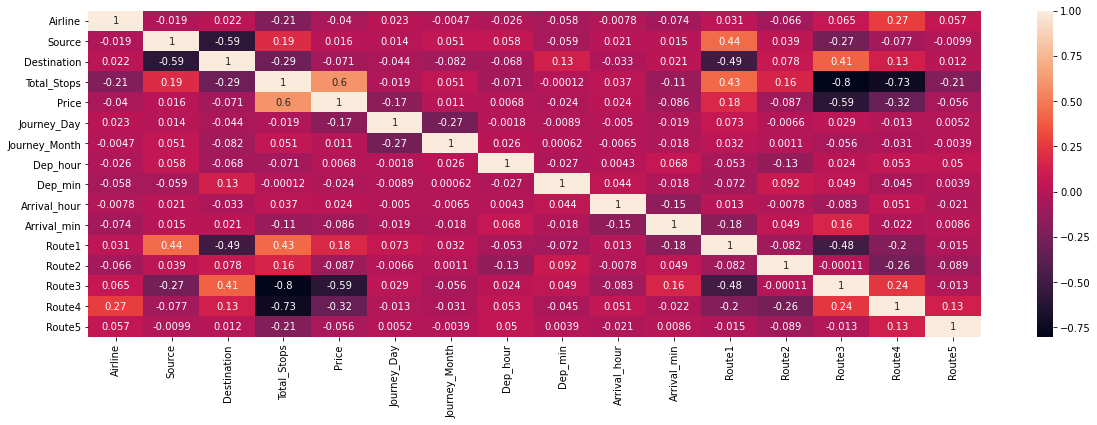

In [53]:
corr=df.corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr,annot=True)

In [54]:
df.corr()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
Airline,1.000000,-0.018547,0.022130,-0.206350,-0.039520,0.023352,-0.004743,-0.026127,-0.057826,-0.007831,-0.074001,0.031143,-0.065582,0.064943,0.269561,0.057245
Source,-0.018547,1.000000,-0.589710,0.191144,0.015998,0.013673,0.050840,0.058471,-0.058563,0.020766,0.015057,0.439694,0.038516,-0.267392,-0.076944,-0.009894
Destination,0.022130,-0.589710,1.000000,-0.294183,-0.071112,-0.043671,-0.082345,-0.068252,0.133008,-0.032645,0.021234,-0.491106,0.078284,0.407291,0.132684,0.011958
Total_Stops,-0.206350,0.191144,-0.294183,1.000000,0.603883,-0.019129,0.051227,-0.070709,-0.000116,0.037154,-0.108233,0.431280,0.159735,-0.802622,-0.728865,-0.208131
Price,-0.039520,0.015998,-0.071112,0.603883,1.000000,-0.165412,0.010700,0.006819,-0.024492,0.024264,-0.086155,0.182135,-0.087297,-0.592577,-0.316937,-0.055643
Journey_Day,0.023352,0.013673,-0.043671,-0.019129,-0.165412,1.000000,-0.265386,-0.001792,-0.008915,-0.004955,-0.018575,0.073356,-0.006625,0.028808,-0.013118,0.005226
Journey_Month,-0.004743,0.050840,-0.082345,0.051227,0.010700,-0.265386,1.000000,0.026043,0.000624,-0.006451,-0.018222,0.032274,0.001135,-0.055765,-0.031035,-0.003861
Dep_hour,-0.026127,0.058471,-0.068252,-0.070709,0.006819,-0.001792,0.026043,1.000000,-0.026674,0.004296,0.067645,-0.053095,-0.131350,0.024309,0.052972,0.050172
Dep_min,-0.057826,-0.058563,0.133008,-0.000116,-0.024492,-0.008915,0.000624,-0.026674,1.000000,0.043967,-0.018133,-0.071679,0.091571,0.048739,-0.045230,0.003910
Arrival_hour,-0.007831,0.020766,-0.032645,0.037154,0.024264,-0.004955,-0.006451,0.004296,0.043967,1.000000,-0.150636,0.013436,-0.007814,-0.082959,0.050719,-0.021275


In [55]:
corr['Price'].sort_values(ascending=False)

Price            1.000000
Total_Stops      0.603883
Route1           0.182135
Arrival_hour     0.024264
Source           0.015998
Journey_Month    0.010700
Dep_hour         0.006819
Dep_min         -0.024492
Airline         -0.039520
Route5          -0.055643
Destination     -0.071112
Arrival_min     -0.086155
Route2          -0.087297
Journey_Day     -0.165412
Route4          -0.316937
Route3          -0.592577
Name: Price, dtype: float64

In [56]:
# Price is correlated with Total_stops
# Price is negetively correlated with Route3,Route4

In [57]:
# Checking skewness

In [58]:
df.skew().sort_values(ascending=False)

Price             1.812552
Route2            1.424807
Destination       1.247893
Airline           0.720924
Route3            0.636468
Journey_Month     0.631080
Journey_Day       0.362805
Total_Stops       0.317797
Dep_min           0.159397
Arrival_min       0.111711
Dep_hour          0.109087
Arrival_hour     -0.384591
Source           -0.424151
Route1           -0.619236
Route4           -2.084009
Route5          -15.985555
dtype: float64

In [59]:
# splitting the data into dependent and independent variables
x=df.drop(columns=['Price'],axis=1)
y=df['Price']

In [60]:
x.shape,y.shape

((13354, 15), (13354,))

In [61]:
#splitting the dataset into train and test

df_train = df.iloc[:10683,:]
df_test = df.iloc[10683:,:]

In [62]:
df_train.shape,df_test.shape

((10683, 16), (2671, 16))

In [63]:
x=df_train.drop(columns=['Price'],axis=1)
y=df_train['Price']

In [64]:
from sklearn.preprocessing import power_transform
df1_train=power_transform(x)

In [65]:
type(df1_train)

numpy.ndarray

In [66]:
df1_train=pd.DataFrame(df1_train,columns=x.columns)

In [67]:
df1_train

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Route1,Route2,Route3,Route4,Route5
0,-0.295500,-1.599712,1.752703,-1.297888,1.179494,-0.819960,1.545951,0.023049,-1.790773,-0.776650,-1.584040,0.357716,1.282430,0.414182,0.065761
1,-1.420300,0.902061,-1.370545,1.574695,-0.823877,-1.885503,-1.356245,1.179291,-0.055921,-0.433070,-0.124298,1.516500,-2.447737,-2.426307,0.065761
2,0.147745,-0.012108,0.005861,1.574695,-0.601399,1.138622,-0.548142,0.255807,-1.362565,0.156814,0.830455,2.016315,-0.878249,-2.421196,0.065761
3,-0.295500,0.902061,-1.370545,0.358738,-0.823877,1.847496,0.956409,-0.933802,1.413973,0.420848,-0.124298,2.144634,-1.224852,0.414182,0.065761
4,-0.295500,-1.599712,1.752703,0.358738,-1.416289,-1.885503,0.646735,1.179291,1.118972,0.670333,-1.584040,2.144634,-0.060834,0.414182,0.065761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-2.244150,0.902061,-1.370545,-1.297888,-1.088959,1.138622,1.107271,1.334273,1.266418,0.156814,-0.124298,-0.948148,1.282430,0.414182,0.065761
10679,-1.420300,0.902061,-1.370545,-1.297888,1.333281,-0.407922,1.255717,1.016618,1.413973,-0.125721,-0.124298,-0.948148,1.282430,0.414182,0.065761
10680,0.147745,-1.599712,0.707053,-1.297888,1.333281,-0.407922,-0.738439,0.023049,-0.348046,-0.125721,-1.584040,0.357716,1.282430,0.414182,0.065761
10681,2.122896,-1.599712,1.752703,-1.297888,-1.416289,-1.885503,-0.184992,0.467355,0.090417,-0.776650,-1.584040,0.357716,1.282430,0.414182,0.065761


In [68]:
df1_train.shape

(10683, 15)

In [69]:
df1_train.skew().sort_values(ascending=False)

Route3            0.081364
Route2            0.058238
Destination       0.041560
Journey_Day       0.017017
Airline          -0.015312
Journey_Month    -0.026453
Total_Stops      -0.059195
Dep_hour         -0.104207
Source           -0.238259
Arrival_min      -0.347616
Arrival_hour     -0.356788
Dep_min          -0.359559
Route1           -0.383285
Route4           -2.002373
Route5          -15.142914
dtype: float64

In [70]:
#checking outliers

In [71]:
x.shape,y.shape

((10683, 15), (10683,))

In [72]:
from scipy.stats import zscore

In [73]:
(np.abs(zscore(x))<3).all()

False

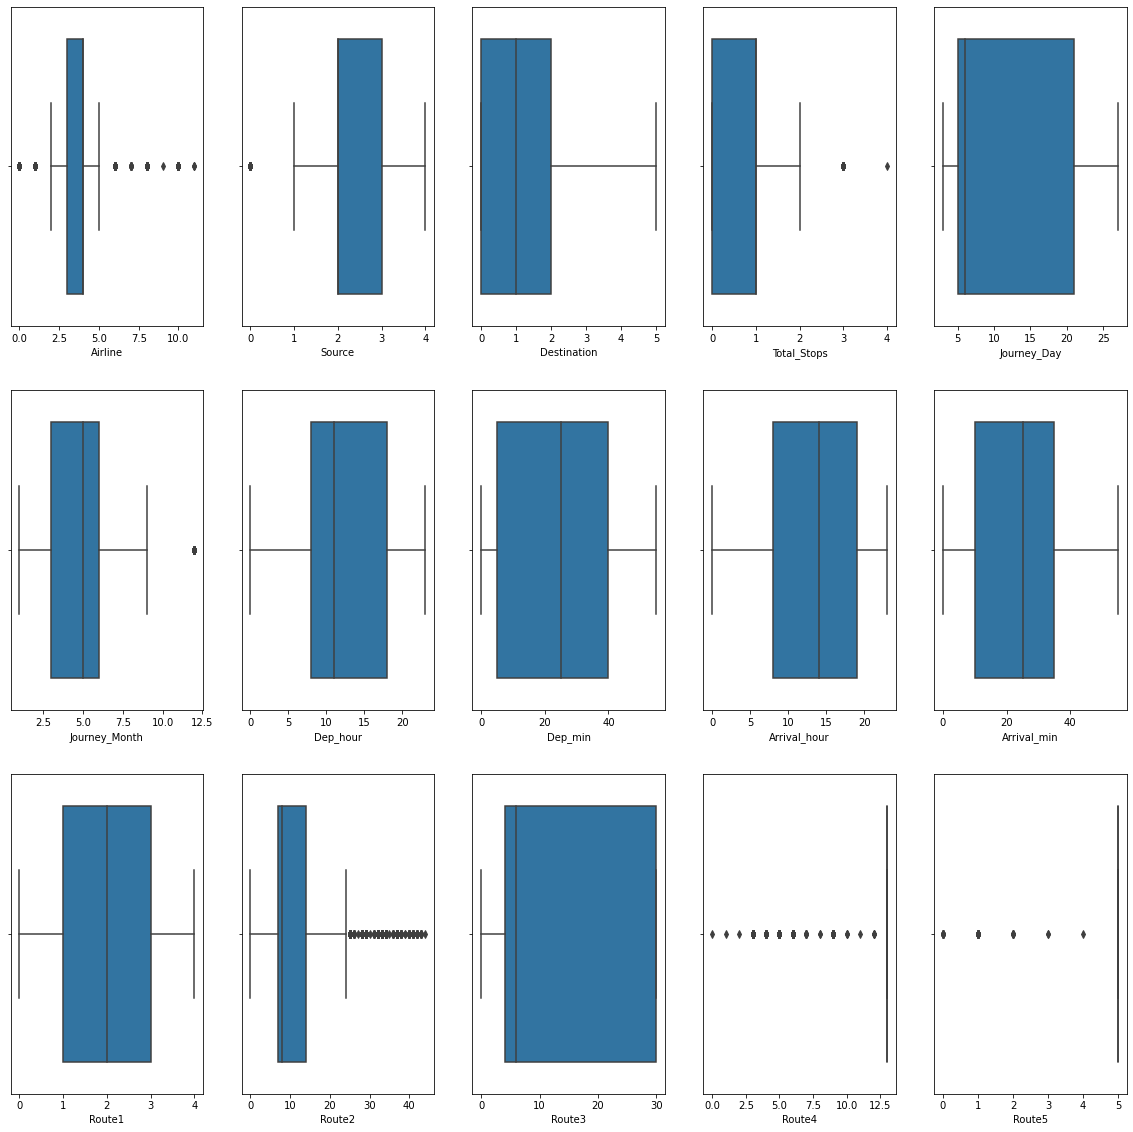

In [74]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [75]:
z_score=zscore(df_train[['Route5','Route4','Route2','Airline','Source','Total_Stops','Journey_Month']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df_train=df_train[filtering_entry]

In [76]:
df_train.shape

(10493, 16)

In [77]:
x=df_train.drop(columns=['Price'],axis=1)
y=df_train['Price']

In [78]:
x.shape,y.shape

((10493, 15), (10493,))

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler=StandardScaler()

In [81]:
x_scaled=scaler.fit_transform(x)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.30,random_state=441)

In [83]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((7345, 15), (7345,), (3148, 15), (3148,))

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [85]:
# Selecting important features

In [86]:
rf=RandomForestRegressor()

In [87]:
rf.fit(x_train,y_train)

RandomForestRegressor()

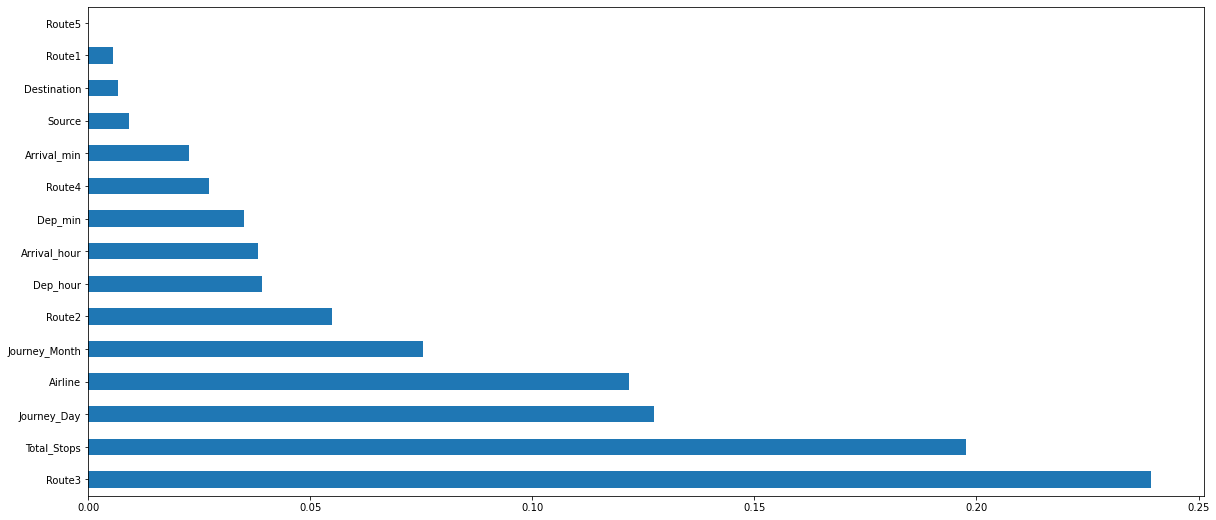

In [88]:
plt.figure(figsize=(20,9))
feature_important=pd.Series(rf.feature_importances_, index=x.columns)
feature_important.nlargest(15).plot(kind='barh')
plt.show()

In [89]:
# route5 is not importart feature

In [90]:
from sklearn.feature_selection import SelectFromModel

In [91]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [92]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [93]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [94]:
selected_features=x.columns[(model.get_support())]

In [95]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Journey_Day',
       'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Route1', 'Route2', 'Route3', 'Route4'],
      dtype='object')

In [96]:
# As Route5 is not important we drop the column

In [97]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)
x_test=x_test.drop(['Route5'],axis=1)
x_train=x_train.drop(['Route5'],axis=1)

In [98]:
lr=LinearRegression()
svr=SVR()
dt=DecisionTreeRegressor()
rfc=RandomForestRegressor()

In [99]:
#Linear Regression
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.47832737060134045

In [100]:
y_pred_lr=lr.predict(x_test)

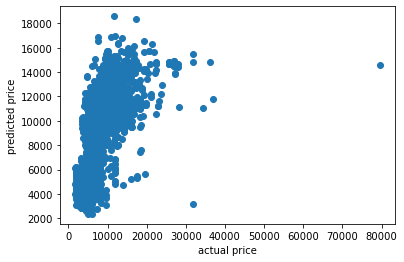

In [101]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [102]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [103]:
print('Mean absolute error :',(metrics.mean_absolute_error(y_test,y_pred_lr)))
print('Mean squared error :',(metrics.mean_squared_error(y_test,y_pred_lr)))
print('Root mean squared error :',(np.sqrt(mean_squared_error(y_test,y_pred_lr))))
print('R2 value is :',(r2_score(y_test,y_pred_lr)))

Mean absolute error : 2358.851557866857
Mean squared error : 11273002.472204179
Root mean squared error : 3357.5292213477724
R2 value is : 0.47832737060134045


In [104]:
# using SVR

In [105]:
svr.fit(x_train,y_train)

SVR()

In [106]:
svr.score(x_test,y_test)

0.034131413468493355

In [107]:
y_predict_svr=svr.predict(x_test)

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predict_svr))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict_svr)))

MAE: 3456.1969509971127
MSE: 20871785.004984982
RMSE: 4568.564873675866


In [109]:
#using random forest regressor

In [110]:
rf=RandomForestRegressor()

In [111]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [112]:
rf.score(x_test,y_test)

0.8091078708794455

In [113]:
y_predict_rfc=rf.predict(x_test)

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predict_rfc))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_rfc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict_rfc)))

MAE: 1180.0484669445336
MSE: 4125053.3806630634
RMSE: 2031.0227425272872


In [115]:
# ussing RandomForestRegressor we get 
# R2score=81.2%
# MAE: 1171
# RMSE: 2012

In [116]:
#Cross validation

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
cross_val_score(lr,x_scaled,y,cv=5)

array([0.49849675, 0.48660744, 0.50232005, 0.48814009, 0.47585049])

In [119]:
cross_val_score(lr,x_scaled,y,cv=5).mean()

0.4902829643551897

In [120]:
cross_val_score(rf,x_scaled,y,cv=5)

array([0.82869271, 0.80901145, 0.84174308, 0.8040807 , 0.751776  ])

In [121]:
cross_val_score(rf,x_scaled,y,cv=5).mean()

0.8108659610359747

In [122]:
# After cv we get r2score 80.8% by RandomForestRegressor

In [123]:
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_rfc})
actual_vs_pred.head(10)

,Actual,Predicted
9024,16704.0,15106.006667
2668,11642.0,11521.320000
5133,12568.0,11807.430000
870,7618.0,11487.406000
8350,8355.0,6558.053333
2052,15129.0,13741.775000
8786,4107.0,4490.290000
7624,10844.0,14115.776167
4723,7832.0,7887.170000
5101,12898.0,12794.190000


In [124]:
# Lasso Regularization

In [125]:
ls=Lasso(alpha=0.005, random_state=0)

In [126]:
ls.fit(x_train,y_train)

Lasso(alpha=0.005, random_state=0)

In [127]:
ls.score(x_test,y_test)

0.478327166726517

In [128]:
y_pred_ls=ls.predict(x_test)

In [129]:
ls=r2_score(y_test,y_pred_ls)

In [130]:
ls

0.478327166726517

In [131]:
# HyperTunning(Ussing RF)

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
parameters={"criterion":['mse','mae'],
            "max_features" :['auto','sqrt','log2'],
             'min_samples_leaf':[2,4,6,8],
             'max_depth':[1,3,5,7]
            }

In [134]:
rfc=RandomForestRegressor()

In [135]:
grid_search=GridSearchCV(rfc,parameters)

In [136]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 6, 8]})

In [137]:
best_param=grid_search.best_params_

In [138]:
best_param

{'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2}

In [148]:
clf=RandomForestRegressor(criterion= 'mse',max_depth=10,max_features= 'auto',min_samples_leaf= 4)

In [149]:
clf.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=10, min_samples_leaf=4)

In [150]:
y_pred_rfc=clf.predict(x_test)

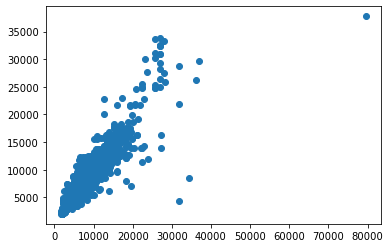

In [151]:
plt.scatter(y_test,y_pred_rfc)

In [152]:
print(r2_score(y_test,y_pred_rfc)*100)
print(cross_val_score(rfc,x_scaled,y,cv=5).mean())

80.89101827710918
0.8086556387087731


In [153]:
# After hypertunning we get 79.3% r2score,cv value 81%

In [154]:
actual_pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_rfc})

In [155]:
actual_pred

,Actual,Predicted
9024,16704.0,15293.617183
2668,11642.0,11959.877884
5133,12568.0,11420.590124
870,7618.0,10699.429274
8350,8355.0,7852.954158
...,...,...
6983,6094.0,5879.185057
10089,9663.0,11777.406034
1085,7174.0,7455.965072
519,4423.0,4189.642504


In [156]:
# Saving model
import joblib
joblib.dump(best_param,'Flight_price.pkl')

['Flight_price.pkl']